**Initial OCS tests**

26/05/23, v1

- For OCS match expt. case, see https://phockett.github.io/ePSdata/OCS-preliminary/OCS_orbs8-11_AFBLMs_VM-ADMs_140122-JAKE_tidy-replot-200722_v5.html
- Downloader now in place.
- Keep everything in notebook for now (see template http://jake:9966/lab/tree/QM3/doc-source/part2/basic_fitting_numerics_intro_260423.ipynb), but should move file IO to OCS-specific script (don't need to show all of this). Some of this is already in main setup fitting demo script, but still have rather specific ADM settings.
- For ADMs and matE working from raw forms currently, may want to consolidate and tidy up for fitting-only case.
- Data gen should be optional.


WHAT THE FUCK IS GOING ON WITH THE DATA IO....

- For multiple files in same dir seems OK, but isn't.\
- For subdirs
   - Fails to scan them?  Only for ePSmultiJob class?
   - Mislabels orbs? WHERE IS THIS NUMBER COMING FROM?????? Modified recently, but not like this...

```
dataPath = fAllMatE['fListDownloaded'][0].parent
dataPath = Path('/home/jovyan/QM3/doc-source/part2/OCSfitting/')  # NOT WORKING AFTER FILE REORG....?????
dataPath = Path('/home/jovyan/QM3/doc-source/part2/OCSfitting/orb11')  # OK AFTER FILE REORG
# WHY IS THIS NOW LABELLED AS ORB14????????????????????????????????
```


TODO:

- Issues with selOpts consistency and settings, esp. for 'it' selection.
    - Working if NO IT selection made in selOpts.
    - IF single IT selected, IT is squeezed, setMatEFit() fails unless colDim is set (for display routine only?)
    - IF single IT selected, and IT dim readded manually, `data.afblmMatEfit()` fails unless run with `selDims={'it': 2}` added!
    - SHOULD BE ABLE to pass no squeeze to selOpts? Also pass to fit correctly! Maybe not fully wrapped as yet...

(chpt:ocs-case-study)=
# Case study: Generalised bootstrapping for a linear heteronuclear scattering system, $OCS~(C_{\infty v})$

## Init and pulling data

Here the setup is mainly handled by some basic scripts, these follow the outline in the {{ PEMtk_docs }}, see in particular [the intro to fitting](https://pemtk.readthedocs.io/en/latest/fitting/PEMtk_fitting_basic_demo_030621-full_010922.html).

In [1]:
# Run default config - may need to set full path here
%run '../scripts/setup_notebook.py'

# Override plotters backend?
# plotBackend = 'pl'

*** Setting up notebook with standard Quantum Metrology Vol. 3 imports...
For more details see https://pemtk.readthedocs.io/en/latest/fitting/PEMtk_fitting_basic_demo_030621-full.html
To use local source code, pass the parent path to this script at run time, e.g. "setup_fit_demo ~/github"

*** Running: 2023-06-09 12:14:32
Working dir: /home/jovyan/QM3/doc-source/part2
Build env: notebook

* Loading packages...


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 
* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.
* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 
* Set Holoviews with bokeh.
Jupyter Book      : 0.15.1
External ToC      : 0.3.1
MyST-Parser       : 0.18.1
MyST-NB           : 0.17.2
Sphinx Book Theme : 1.0.1
Jupyter-Cache     : 0.6.1
NbClient          : 0.5.4


In [2]:
# Pull data files as required from Github, note the path here is required

# from epsproc.util.io import getFilesFromGithub

# fDict, fAll = getFilesFromGithub(subpath='data/alignment/OCS_ADMs_28K_VM_070722', ref='dev')   # OK

# 26/05/23 - Monkeypatch version for debug
# Above should be fine after source updates
import requests
from epsproc.util import io
io.requests = requests 

dataName = 'OCSfitting'

fDictMatE, fAllMatE = io.getFilesFromGithub(subpath='data/photoionization/OCS_multiorb', dataName=dataName, ref='dev')  #, download=False)   # N2 matrix elements
fDictADM, fAllADM = io.getFilesFromGithub(subpath='data/alignment/OCS_ADMs_28K_VM_070722', dataName=dataName, ref='dev')  #, download=False)   # N2 alignment data
# Note this is missing script - should consolidate all to book repo?
# Note ref='dev' for OCS currently (dev branch

# Alternatively supply URLs directly for file downloader
# Pull N2 data from ePSproc Github repo
# URLs for test ePSproc datasets - n2
# For more datasets use ePSdata, see https://epsproc.readthedocs.io/en/dev/demos/ePSdata_download_demo_300720.html
# urls = {'n2PU':"https://github.com/phockett/ePSproc/blob/master/data/photoionization/n2_multiorb/n2_1pu_0.1-50.1eV_A2.inp.out",
#         'n2SU':"https://github.com/phockett/ePSproc/blob/master/data/photoionization/n2_multiorb/n2_3sg_0.1-50.1eV_A2.inp.out",
#         'n2ADMs':"https://github.com/phockett/ePSproc/blob/master/data/alignment/N2_ADM_VM_290816.mat",
#         'demoScript':"https://github.com/phockett/PEMtk/blob/master/demos/fitting/setup_fit_demo.py"}

# fList, fDict = io.getFilesFromURLs(urls, dataName=dataName)

Querying URL: https://api.github.com/repos/phockett/epsproc/contents/data/photoionization/OCS_multiorb?ref=dev
Local file /home/jovyan/QM3/doc-source/part2/OCSfitting/OCS_survey.orb10_E0.1_2.0_30.1eV.inp.out already exists
Local file /home/jovyan/QM3/doc-source/part2/OCSfitting/OCS_survey.orb10_E1.1_2.0_31.1eV.inp.out already exists
Local file /home/jovyan/QM3/doc-source/part2/OCSfitting/OCS_survey.orb11_E0.1_2.0_30.1eV.inp.out already exists
Local file /home/jovyan/QM3/doc-source/part2/OCSfitting/OCS_survey.orb11_E1.1_2.0_31.1eV.inp.out already exists
Querying URL: https://api.github.com/repos/phockett/epsproc/contents/data/alignment/OCS_ADMs_28K_VM_070722?ref=dev
Local file /home/jovyan/QM3/doc-source/part2/OCSfitting/A20_300fs_4p2TW_28K.dat already exists
Local file /home/jovyan/QM3/doc-source/part2/OCSfitting/A40_300fs_4p2TW_28K.dat already exists
Local file /home/jovyan/QM3/doc-source/part2/OCSfitting/A60_300fs_4p2TW_28K.dat already exists
Local file /home/jovyan/QM3/doc-source/pa

### Load matrix elements

TODO: keys and jobNotes are currently set to be the same for all files in dir, although they are correctly read.
Should fix file IO or reorg files.

UPDATE: testing manual file reorg, OTHERWISE ALL FILES CONCATENATED IT SEEMS? ALTHOUGH NOT SHOWN IN FILELIST, but seeing duplicate Ekes and symmetries!!!!

In [3]:
# dataPath = fAllMatE['fListDownloaded'][0].parent
# dataPath = Path('/home/jovyan/QM3/doc-source/part2/OCSfitting/')  # NOT WORKING AFTER FILE REORG....?????
dataPath = Path('/home/jovyan/QM3/doc-source/part2/OCSfitting/orb11')  # OK AFTER FILE REORG
# WHY IS THIS NOW LABELLED AS ORB14????????????????????????????????

# Init class object
data = pemtkFit(fileBase = dataPath, verbose = 1)

# Read data files
# data.scanFiles(keyType='int')
data.scanFiles()

*** Warning: Missing records, expected 64, found 48.
*** Warning: Found 16 blank sets of matrix elements, symmetries ['A2']
*** Warning: Missing records, expected 64, found 48.
*** Warning: Found 16 blank sets of matrix elements, symmetries ['A2']

*** Job subset details
Key: subset
No 'job' info set for self.data[subset].

*** Job orb14 details
Key: orb14
Dir /home/jovyan/QM3/doc-source/part2/OCSfitting/orb11, 2 file(s).
{   'batch': 'ePS OCS, batch OCS_survey, orbital orb11',
    'event': ' orb 11 ionization, basic survey run.',
    'orbE': -11.35803261907539,
    'orbLabel': '# OCS, orb 11 ionization, basic survey run.'}


In [4]:
# data.data[0]['XS'].fileList

In [5]:
# data.data[1]['XS'].fileList

In [6]:
data.molSummary(dataKey='orb14')

*** Molecular structure

*** Molecular orbital list (from ePS output file)
EH = Energy (Hartrees), E = Energy (eV), NOrbGrp, OrbGrp, GrpDegen = degeneracies and corresponding orbital numbering by group in ePS, NormInt = single centre expansion convergence (should be ~1.0).


props,Sym,EH,Occ,E,NOrbGrp,OrbGrp,GrpDegen,NormInt
orb,,,,,,,,
1,S,-91.990,2.0,-2503.178,1.0,1.0,1.0,0.661
2,S,-20.675,2.0,-562.590,1.0,2.0,1.0,0.963
3,S,-11.445,2.0,-311.437,1.0,3.0,1.0,1.000
4,S,-8.994,2.0,-244.728,1.0,4.0,1.0,0.951
5,S,-6.676,2.0,-181.674,1.0,5.0,1.0,0.994
6,P,-6.672,2.0,-181.557,1.0,6.0,2.0,0.979
7,P,-6.672,2.0,-181.557,2.0,6.0,2.0,0.979
8,S,-1.537,2.0,-41.832,1.0,7.0,1.0,0.998
9,S,-1.088,2.0,-29.595,1.0,8.0,1.0,0.997



*** Warning: some orbital convergences outside single-center expansion convergence tolerance (0.01):
[[1.         0.66056934]
 [2.         0.96318872]
 [4.         0.95118653]
 [6.         0.9785498 ]
 [7.         0.9785498 ]]


/opt/conda/lib/python3.9/site-packages/epsproc/basicPlotters.py:84: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


In [7]:
# key='orb14'
# data.data[key]['jobNotes']  #['orbKey']


# FROM OLD PROCESSING - may need some of this again!
# # Fix labels for plots - currently have some mis-named files!

# # Set state labels
# v = ['C','B','A','X']
# sDict = {n:v[k] for k,n in enumerate(range(9,13))}

# for key in data.data.keys():
#     data.data[key]['jobNotes']['orbKey'] = key  # Existing orb key, from filename
#     data.data[key]['jobNotes']['orbGroup'] = int(key.strip('orb')) + 1   # Corrected orb group
# #     data.data[key]['jobNotes']['orbLabel'] = f"HOMO - {12 - int(key.strip('orb')) - 1}"
#     data.data[key]['jobNotes']['orbLabel'] = sDict[data.data[key]['jobNotes']['orbGroup']]

### Load alignment data

Here settings for OCS ADMs in raw format and conversion to expected type and normalisation.

In [8]:
# Load test ADMs from .mat files.
# Code adapted from N2 case, https://epsproc.readthedocs.io/en/latest/methods/geometric_method_dev_pt3_AFBLM_090620_010920_dev_bk100920.html#Test-compared-to-experimental-N2-AF-results...
#
# To check individual file contents just use `loadmat(file)`
# 

ADMtype = 'dat'
ADMscaleFactor = 1  # Try quick SF to circumvent thresholding issues in current code - should be renormed out in final Blms
                     # Tested for 100 - still some weird stuff happening, although very different weird stuff!
                     # 10 maybe a bit better? Or 2...?
                     # May also be issue with complex form for ADMs...? Testing setting real part only later

renorm = False  # Apply additional renorm factors?

from scipy.io import loadmat

# if ADMtype == 'mat':

#     # Original ADMs 14/01/22 - matlab files
#     ADMdataDir = Path('~/ePS/OCS/OCS_alignment_ADMs_VM_140122')
#     renorm = True  # Additional renormalisation by (2*K+1)/8*pi^2
    
# else:
#     # Updated ADMs from dat files
#     # Note these are also Matlab hdf5, but different var labels.
#     ADMdataDir = Path('~/ePS/OCS/OCS_ADMs_28K_VM_070722')
#     renorm = False  # Additional renormalisation by (2*K+1)/8*pi^2
    
# fList = ep.getFiles(fileBase =  ADMdataDir.expanduser(), fType='.'+ADMtype)

# From downloader
fList = fAllADM['fListDownloaded']


ADMs = []
ADMLabels = []

for f in fList:
    
    if ADMtype == 'mat':
        item = Path(f).name.rstrip('ocs.mat')  # Get & set variable name

    else:
        item = Path(f).name.split('_')[0]  # Get & set variable name
    
        
    if item == 'time':
        if ADMtype == 'mat':
            item = 'timeocs'
            
        t = loadmat(f)[item][0,:]
        
    elif item == 'c2t':
        c2t = loadmat(f)[item][:,0]
        
    else:
        # Should use re herer!
        if ADMtype == 'mat':
            K = int(item.strip('D'))
            item = item + 'ave'
        else:
#             try:
            K = int(item.strip('A')[0])
#             except:
#                 pass   # For now just skip cos^2 t term
            

#         ADMs.append(np.asarray([K,0,0,loadmat(f)[item][:,0]]))
#         ADMs.append([K,0,0,loadmat(f)[item][:,0]])
#         ADMs.append(loadmat(f)[item][:,0])
        ADMs.append(loadmat(f)[item][:,0]*ADMscaleFactor)
        ADMLabels.append([K,0,0])
        
            
            
# Add K = 0 (population) term?
# NOTE - may need additional renorm?
addPop = True
if addPop:
    if renorm:
        # ADMs.append(np.ones(t.size) * np.sqrt(4*np.pi))
        # ADMs.append(np.ones(t.size) / np.sqrt(4*np.pi))
        ADMs.append(np.ones(t.size) / (4*np.pi))
    
    else:
#         ADMs.append(np.ones(t.size))  # * np.sqrt(4*np.pi))  1/(4*pi)
        ADMs.append(np.ones(t.size) * 1/(8*np.pi**2))
        
    ADMLabels.append([0,0,0])
        
ADMLabels = np.array(ADMLabels)

In [9]:
# data.setADMs(ADMs = ADMs['ADM'], t=ADMs['time'].squeeze(), KQSLabels = ADMs['ADMlist'], addS = True)

data.setADMs(ADMs = ADMs, KQSLabels = ADMLabels, t=t)

if renorm:
    # ADMs = ADMs * (2*ADMs.K+1)/(8*np.pi**2)  # Additional renormalisation by (2*K+1)/8*pi^2
    data.data['ADM']['ADM'] = data.data['ADM']['ADM'] * 1/(4*np.pi)  # Norm from expt. case.

Dataset: ADM, ADM


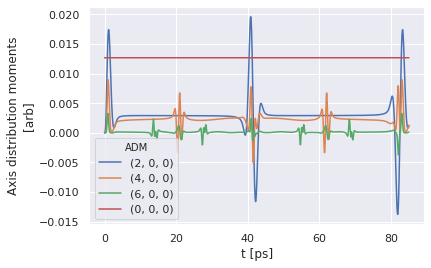

In [10]:
%matplotlib inline
# data.ADMplot()  # FAILS
data.ADMplot(keys = 'ADM')  # OK
# data.ADMplot(keys = 'ADM', dataType='ADM', backend='hv')  # FAILS, issue with assumed dims?
# data.BLMplot(dataType = dataType, xDim = xDim, Etype = Etype, col = col, **kwargs)

In [11]:
# HVplot example
data.data['ADM']['ADM'].unstack().squeeze().real.hvplot.line(x='t').overlay('K')

:NdOverlay   [K]
   :Curve   [t]   (ADM)

In [12]:
key = 'ADM'
dataType='ADM'
data.data[key][dataType].unstack().real.hvplot.line(x='t').overlay(['K','Q','S'])

:NdOverlay   [S,Q,K]
   :Curve   [t]   (ADM)

### Polarisation geometry/ies

This wraps [ep.setPolGeoms](https://epsproc.readthedocs.io/en/dev/modules/epsproc.sphCalc.html#epsproc.sphCalc.setPolGeoms). This defaults to (x,y,z) polarization geometries. Values are set in `self.data['pol']`.

Note: if this is not set, the default value will be used, which is likely not very useful for the fit!

In [13]:
data.setPolGeoms()
data.data['pol']['pol']

<xarray.DataArray (Labels: 3)>
array([quaternion(1, -0, 0, 0),
       quaternion(0.707106781186548, -0, 0.707106781186547, 0),
       quaternion(0.5, -0.5, 0.5, 0.5)], dtype=quaternion)
Coordinates:
    Euler    (Labels) object (0.0, 0.0, 0.0) ... (1.5707963267948966, 1.57079...
  * Labels   (Labels) <U32 'z' 'x' 'y'
Attributes:
    dataType:  Euler

### Subselect data

Currently handled in the class by setting `self.selOpts`, this allows for simple reuse of settings as required. Subselected data is set to `self.data['subset'][dataType]`, and is the data the fitting routine will use.

TODO: fix issues with squeeze here... adding 'it' selector to matE selOpts currently causes issues for fitting - should be able to pass 'sq':False and/or do better dim handling here?

In [14]:
# Settings for type subselection are in selOpts[dataType]

# E.g. Matrix element sub-selection
data.selOpts['matE'] = {'thres': 0.01, 'inds': {'Type':'L', 'Eke':10.1, 'it':2}, 'sq':False}
data.setSubset(dataKey = 'orb14', dataType = 'matE')  # Subselect from '1' dataset, matrix elements for HOMO

# Show subselected data
# data.data['subset']['matE']

# Tabulate the matrix elements
# Not showing as nice table for singleton case - pd.series vs. dataframe?
# data.matEtoPD(keys = 'subset', xDim = 'Sym', drop=False)

# And for the polarisation geometries...
data.selOpts['pol'] = {'inds': {'Labels': 'z'}}
data.setSubset(dataKey = 'pol', dataType = 'pol')

# And for the ADMs...
# SLICE version - was working, but not working July 2022, not sure if it's data types or Xarray version issue? Just get KeyErrors on slice.
# data.selOpts['ADM'] = {}   #{'thres': 0.01, 'inds': {'Type':'L', 'Eke':1.1}}
# data.setSubset(dataKey = 'ADM', dataType = 'ADM', sliceParams = {'t':[38, 44, 4]}) 

#********** HACKS/DEBUG
# Inds/mask version - seems more robust?
trange=[38, 44]  # Set range in ps for calc
tStep=4  # Set tStep for downsampling
tMask = (data.data['ADM']['ADM'].t>trange[0]) & (data.data['ADM']['ADM'].t<trange[1])
data.data[data.subKey]['ADM'] = data.data['ADM']['ADM'][:,tMask][:,::tStep]  # Set and update
print(f"ADMs: Selecting {data.data['subset']['ADM'].t.size} points from {data.data['ADM']['ADM'].t.size}")

# Fix issues with squeezed 'it' coord in single selection case
data.data[data.subKey]['matE'] = data.data[data.subKey]['matE'].expand_dims(dim='it')

Subselected from dataset 'orb14', dataType 'matE': 288 from 67968 points (0.42%)
Subselected from dataset 'pol', dataType 'pol': 1 from 3 points (33.33%)
ADMs: Selecting 31 points from 1775


In [15]:
data.data['subset']['matE']

<xarray.DataArray 'orb11' (it: 1, LM: 32, Sym: 3, mu: 3)>
array([[[[ 2.0019967e-01-0.19444552j,            nan       +nanj,
           2.0019967e-01-0.19444552j],
         [           nan       +nanj,            nan       +nanj,
                     nan       +nanj],
         [           nan       +nanj,            nan       +nanj,
                     nan       +nanj]],

        [[           nan       +nanj,            nan       +nanj,
                     nan       +nanj],
         [           nan       +nanj,            nan       +nanj,
                     nan       +nanj],
         [           nan       +nanj,  1.4714861e-01-0.14316812j,
                     nan       +nanj]],

        [[-8.4400727e-01-0.00687701j,            nan       +nanj,
          -8.4400727e-01-0.00687701j],
         [           nan       +nanj,            nan       +nanj,
                     nan       +nanj],
         [           nan       +nanj,            nan       +nanj,
                     nan       +nanj]],
...
        [[           nan       +nanj,            nan       +nanj,
                     nan       +nanj],
         [           nan       +nanj,            nan       +nanj,
           1.1196313e-02+0.00373606j],
         [           nan       +nanj,            nan       +nanj,
                     nan       +nanj]],

        [[ 9.7548638e-03+0.00828636j,            nan       +nanj,
           9.7548638e-03+0.00828636j],
         [           nan       +nanj,            nan       +nanj,
                     nan       +nanj],
         [           nan       +nanj,            nan       +nanj,
                     nan       +nanj]],

        [[           nan       +nanj,            nan       +nanj,
                     nan       +nanj],
         [ 1.1196313e-02+0.00373606j,            nan       +nanj,
                     nan       +nanj],
         [           nan       +nanj,            nan       +nanj,
                     nan       +nanj]]]])
Coordinates:
  * LM       (LM) MultiIndex
  - l        (LM) int64 0 1 1 1 2 2 2 2 2 3 3 3 3 ... 5 5 5 5 5 6 6 6 6 6 7 7 7
  - m        (LM) int64 0 -1 0 1 -2 -1 0 1 2 -2 -1 ... 0 1 2 -2 -1 0 1 2 -2 0 2
  * mu       (mu) int64 -1 0 1
    Type     <U1 'L'
  * it       (it) int64 2
  * Sym      (Sym) MultiIndex
  - Cont     (Sym) object 'S' 'D' 'P'
  - Targ     (Sym) object 'P' 'P' 'P'
  - Total    (Sym) object 'P' 'P' 'S'
    Eke      float64 10.1
    Ehv      float64 21.5
    SF       complex128 (2.52222+3.1984853j)
Attributes:
    dataType:  matE
    file:      OCS_survey.orb11_E0.1_2.0_30.1eV.inp.out
    fileBase:  /home/jovyan/QM3/doc-source/part2/OCSfitting/orb11
    fileList:  ['/home/jovyan/QM3/doc-source/part2/OCSfitting/orb11/OCS_surve...
    jobLabel:  # OCS, orb 11 ionization, basic survey run.

## Compute AF-$\beta_{LM}$ and simulate data

With all the components set, some observables can be calculated. For testing, we'll also use this to simulate an experiemental trace...

Here we'll use `self.afblmMatEfit()`, which is also the main fitting routine, and essentially wraps `epsproc.afblmXprod()` to compute AF-$\beta_{LM}$s (for more details, see the [ePSproc method development docs](https://epsproc.readthedocs.io/en/dev/methods/geometric_method_dev_pt3_AFBLM_090620_010920_dev_bk100920.html)).

If called without reference data, the method returns computed AF-$\beta_{LM}$s based on the input subsets already created, and also a set of (product) basis functions generated - these can be examined to get a feel for the sensitivity of the geometric part of the problem, and will also be used in fitting to limit repetitive computation.

### Compute AF-$\beta_{LM}$s

In [16]:
# Compute using class structure
# Q: does this use selOpts from above...?
# Q: Need to pass ADMs here too? Otherwise just get single t
# data.AFBLM(keys = keys, AKQS = ADMs, selDims = {'Type':'L'}, thres=None)

# data.AFBLM(keys = 'subset', thres=None, selDims = {'Type':'L'}, sq=False)   #, Etype='t', thresDims='t', selDims = {'Type':'L'})

In [17]:
# data.data['subset']['AFBLM']

In [18]:
# data.BLMplot(keys='subset',  Etype='t', col=None, thres=1e-4)

In [19]:
# Compute using fit wrapper - this should be simpler, but may need additional renorm?

# data.afblmMatEfit(data = None)  # OK
# BetaNormX, basis = data.afblmMatEfit()  # OK, uses default polarizations & ADMs as set in data['subset']
BetaNormX, basis = data.afblmMatEfit(selDims={'it': 2})   # Also need this with selOpts set, but dim readded, TO FIX!
# BetaNormX, basis = data.afblmMatEfit(ADM = data.data['subset']['ADM'])  # OK, but currently using default polarizations
# BetaNormX, basis = data.afblmMatEfit(ADM = data.data['subset']['ADM'], pol = data.data['pol']['pol'].sel(Labels=['x']))
# BetaNormX, basis = data.afblmMatEfit(ADM = data.data['subset']['ADM'], pol = data.data['pol']['pol'].sel(Labels=['x','y']))  # This fails for a single label...?
# BetaNormX, basis = data.afblmMatEfit(RX=data.data['pol']['pol'])  # This currently fails, need to check for consistency in ep.sphCalc.WDcalc()
                                                                    # - looks like set values and inputs are not consistent in this case? Not passing angs correctly, or overriding?
                                                                    # - See also recently-added sfError flag, which may cause additional problems.

### AF-$\beta_{LM}$s

The returned objects contain the $\beta_{LM}$ parameters as an Xarray...

TODO: FIX IT - needs thresholding?

- YEP: OK with BLMplot with some non-default settings - should add these as defaults too depending on dims.
- BUT only showing unnorm Betas...?  Why? Option set for fitting case?
   - See updates below - issue is renorm by matrix elements to theoretical XS in afblm routine, which is incorrect if ADMs unnormed.
   - 30/05/23 Now added below (and updated renormL0 routine), may want to look more closely at ADMs too?
- Also need to set it=2 for calc, otherwise get -ve XS (although just phase issue).

In [20]:
# Line-plot with Xarray/Matplotlib
# Note there is no filtering here, so this includes some invalid and null terms
# BetaNormX.sel(Labels='A').real.squeeze().plot.line(x='t');

In [49]:
# Set data for simulation
data.setData('sim', BetaNormX)  # Set simulated data to master structure as "sim"
data.setSubset('sim','AFBLM')   # Set to 'subset' to use for fitting.

# Set basis functions
data.basis = basis

Subselected from dataset 'sim', dataType 'AFBLM': 837 from 837 points (100.00%)


Dataset: sim, AFBLM


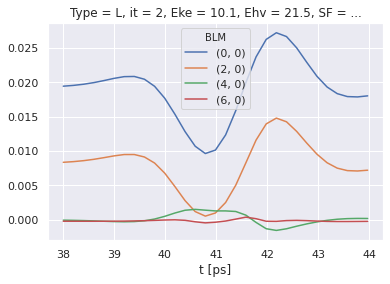

In [22]:
data.BLMplot(keys='sim', Etype='t', col=None, thres=1e-4)

In [23]:
data.BLMplot(keys='sim', Etype='t', col=None, thres=1e-4, backend='hv')

BLMplot set data and plots to self.plots['BLMplot']


:HoloMap   [Orb]
   :NdOverlay   [l,m]
      :Curve   [t]   (BLM)

True

In [24]:
# Not plotting..? Missing config?
data.plots['BLMplot']['hv']

:HoloMap   [Orb,l,m]
   :Curve   [t]   (BLM)

In [25]:
# # ep.plot.hvPlotters.setPlotters()
# ep.plot.hvPlotters.setPlotters(width=imgWidth, height=imgHeight)  # OK after rerunning setplotters...?
# import hvplot.xarray
# data.plots['BLMplot']['hv'].overlay(['l','m'])

In [26]:
# Add XS to rescale?
data.BLMplot(keys='sim', Etype='t', col=None, thres=1e-4, backend='hv', XS=True)

BLMplot set data and plots to self.plots['BLMplot']


:HoloMap   [Orb]
   :NdOverlay   [l,m]
      :Curve   [t]   (BLM)

True

In [27]:
# BetaNormX.sel({'l':0}).sel({'m':0}).drop_vars('m').squeeze()   #, drop=True)  #.drop_vars('m')  #.squeeze()
# BetaNormX.sel({'l':0}).sel({'m':0}).drop('m')

In [28]:
# # Renormalise to B00? This is currently required for corrected beta parameters since only matrix elements are used in the default case

# # from epsproc.util.conversion import renormL0
# # # renormL0(BetaNormX)  # Currently fails, due to inplace opearation?

# BetaNormXRN = BetaNormX/BetaNormX.sel({'l':0}).sel({'m':0}).drop('m')

# # Set data for simulation
# data.setData('sim', BetaNormXRN)  # Set simulated data to master structure as "sim"
# data.setSubset('sim','AFBLM')   # Set to 'subset' to use for fitting.

# # data.BLMplot(keys='sim', Etype='t', col=None, thres=1e-4, backend='hv')

# data.BLMplot(keys='sim', Etype='t', col=None, thres=1e-4, backend='hv')

In [29]:
# 30/05/23 - source now fixed, should work on next build
# from epsproc.util.conversion import renormL0

# # renormL0(BetaNormX)  # Currently fails, due to inplace opearation?
# dataOut = BetaNormX.copy()
# # dataOut /= dataOut.sel({'L':0}).drop('M').squeeze()
# # dataOut = dataOut/dataOut.sel({'L':0}).drop('M').squeeze()
# # hasattr(dataOut,'l')
# dataOut = dataOut/dataOut.sel({'l':0}).drop('m').squeeze()  # OK!
# dataOut

## Setup fit...

In [30]:
data.subKey

'subset'

In [31]:
# data.data[data.subKey]['matE']

In [32]:
# Init fitting from 
data.setMatEFit()  # Default case, note this expects 'it' to be present.
# data.setMatEFit(colDim='mu')

Set 40 complex matrix elements to 80 fitting params, see self.params for details.
Auto-setting parameters.


name,value,initial value,min,max,vary,expression
m_D_P_P_2_n2_1_2,1.17426347,1.1742634683116222,1.0000e-04,5.00000000,True,
m_D_P_P_2_2_n1_2,1.17426347,1.1742634683116222,1.0000e-04,5.00000000,False,m_D_P_P_2_n2_1_2
m_D_P_P_3_n2_1_2,1.90079016,1.9007901574679322,1.0000e-04,5.00000000,True,
m_D_P_P_3_2_n1_2,1.90079016,1.9007901574679322,1.0000e-04,5.00000000,False,m_D_P_P_3_n2_1_2
m_D_P_P_4_n2_1_2,1.06481940,1.0648193977617435,1.0000e-04,5.00000000,True,
m_D_P_P_4_2_n1_2,1.06481940,1.0648193977617435,1.0000e-04,5.00000000,False,m_D_P_P_4_n2_1_2
m_D_P_P_5_n2_1_2,0.23732736,0.2373273605053644,1.0000e-04,5.00000000,True,
m_D_P_P_5_2_n1_2,0.23732736,0.2373273605053644,1.0000e-04,5.00000000,False,m_D_P_P_5_n2_1_2
m_D_P_P_6_n2_1_2,0.13174098,0.13174097580343758,1.0000e-04,5.00000000,True,
m_D_P_P_6_2_n1_2,0.13174098,0.13174097580343758,1.0000e-04,5.00000000,False,m_D_P_P_6_n2_1_2


## Test fit for perfect case...

Expect to see symmetry limitations here...

In [108]:
# data.randomizeParams()  # Randomize input parameters if desired
                          # For method testing using known initial params is also useful
data.fit()

In [109]:
# Check fit outputs - self.result shows results from the last fit
data.result

Dataset: subset, AFBLM
Dataset: 0, AFBLM


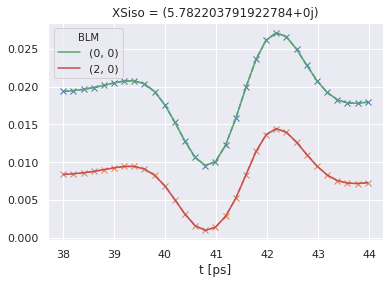

In [110]:
data.BLMfitPlot()

## Multiple fits...

1. Randomise params, but no noise added.
    - Analysis http://jake:9966/lab/tree/QM3/doc-source/part2/case-study-OCS_dataProc_090623.ipynb
    - Get many perfect results (chi^2 < 1e-22), and look perfect on BLM(t) plots too.
    - Need to add filtering by "vary=True/False" for large datasets, have many redundant params here! Currently uses `data.data['fits']['dfWide']` for analysis, which drops this info.
2. Add noise...
    - Used routine from http://jake/jupyter/user/paul/doc/tree/projects-share/manuscripts/MFrecon_review_2022/notebook_redux_090323/fitting_data_130621/PEMtk_fitting_demo_multi-fit_tests_130621-MFtests_120822-tidy-retest.ipynb, have better version elsewhere...? Stimpy test notebooks...? AH, yes - see `code-share/stimpy-docker-local/pemtk_fitting_runs_April2022/`
    - NEED TO DEPLOY ON FOCK, RAM limited on Jake at the moment.

In [33]:
# L-noise
# Routine from http://jake/jupyter/user/paul/doc/tree/projects-share/manuscripts/MFrecon_review_2022/notebook_redux_090323/fitting_data_130621/PEMtk_fitting_demo_multi-fit_tests_130621-MFtests_120822-tidy-retest.ipynb

# Add noise with np.random.normal
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
# data.data['subset']['AFBLM']

# import numpy as np
# mu, sigma = 0, 0.05  # Up to approx 10% noise (+/- 0.05)
# # creating a noise with the same dimension as the dataset (2,2) 
# noise = np.random.normal(mu, sigma, [data.data['subset']['AFBLM'].Labels.size, data.data['subset']['AFBLM'].l.size])
# # data.BLMfitPlot()

# # Set noise in Xarray & scale by l
# import xarray as xr
# noiseXR = xr.ones_like(data.data['subset']['AFBLM']) * noise
# # data.data['subset']['AFBLM']['noise'] = ((data.data['subset']['AFBLM'].t, data.data['subset']['AFBLM'].l), noise)
# # xr.where(noiseXR.l>0, noiseXR/noiseXR.l, noiseXR)
# noiseXR = noiseXR.where(noiseXR.l<1, noiseXR/(noiseXR.l))  # Scale by L

# data.data['subset']['AFBLM'] = data.data['subset']['AFBLM'] + noiseXR
# data.data['subset']['AFBLM'] = data.data['subset']['AFBLM'].where(data.data['subset']['AFBLM'].m == 0, 0)


In [54]:
# # t-noise
# # Routine from http://jake/jupyter/user/paul/doc/tree/code-share/stimpy-docker-local/pemtk_fitting_runs_April2022/PEMtk_fitting_dev_weights_runs_050522-run6_8-10-5_84_tpoints.ipynb

# # Add noise with np.random.normal
# # https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
# # data.data['subset']['AFBLM']

import numpy as np
mu, sigma = 0, 0.05  # Up to approx 10% noise (+/- 0.05)
# creating a noise with the same dimension as the dataset (2,2) 
noise = np.random.normal(mu, sigma, [data.data['subset']['AFBLM'].t.size, data.data['subset']['AFBLM'].l.size])
# data.BLMfitPlot()

# Set noise in Xarray & scale by l
import xarray as xr
noiseXR = xr.ones_like(data.data['subset']['AFBLM']) * noise * data.data['subset']['AFBLM'].max()  # FOR OCS ADDED * data.data['subset']['AFBLM'].max() to rescale noise, otherwise ~100%!  Issue is renorm (or not) of values with ADMs.
# data.data['subset']['AFBLM']['noise'] = ((data.data['subset']['AFBLM'].t, data.data['subset']['AFBLM'].l), noise)
# xr.where(noiseXR.l>0, noiseXR/noiseXR.l, noiseXR)
noiseXR = noiseXR.where(noiseXR.l<1, noiseXR/(noiseXR.l))  # Scale by L

data.data['subset']['AFBLM'] = data.data['subset']['AFBLM'] + noiseXR
data.data['subset']['AFBLM'] = data.data['subset']['AFBLM'].where(data.data['subset']['AFBLM'].m == 0, 0)

data.BLMfitPlot()

In [55]:
data.data['subset']['AFBLM'].max()

<xarray.DataArray ()>
array(0.02768091+9.36024609e-20j)
Coordinates:
    Type     <U1 'L'
    it       int64 2
    Eke      float64 10.1
    Ehv      float64 21.5
    SF       complex128 (2.52222+3.1984853j)
    XSiso    complex128 (5.782203791922784+0j)

Dataset: sim, AFBLM
Dataset: subset, AFBLM


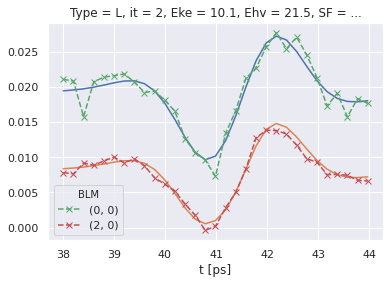

In [56]:
data.BLMfitPlot(keys=['sim','subset'])

In [34]:
data.multiFit(nRange = [0,10], num_workers =10)

Number of processors:  64 
Running pool on:  10


  0%|          | 0/10 [00:00<?, ?it/s]OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels i

* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 
* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.
* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 
* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 
* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.
* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 
* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 
* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.
* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 
* sparse not found, sparse matrix forms not availabl

100%|##########| 10/10 [29:53:09<00:00, 10758.90s/it]    


In [35]:
data.writeFitData(outStem="OCS_10fit_1D-test_withNoise")

Dumped self.data to /home/jovyan/QM3/doc-source/part2/OCS_10fit_1D-test_withNoise_100623_18-08-25.pickle with pickle.
Dumped data to /home/jovyan/QM3/doc-source/part2/OCS_10fit_1D-test_withNoise_100623_18-08-25.pickle with pickle.


PosixPath('/home/jovyan/QM3/doc-source/part2/OCS_10fit_1D-test_withNoise_100623_18-08-25.pickle')

* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 
* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.
* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 
* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 
* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.
* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 


In [113]:
data.data.keys()

dict_keys(['subset', 'orb14', 'ADM', 'pol', 'sim', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [114]:
# data.multiFit(nRange = [100,500], num_workers =20)
data.multiFit(nRange = [10,500], num_workers =10)
data.writeFitData(outStem="OCS_500fit_1D-test_withNoise")

Number of processors:  64 
Running pool on:  20


  0%|          | 0/400 [00:00<?, ?it/s]OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels 

* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 
* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.
* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 
* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 
* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.
* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 
* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 
* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.
* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 
* sparse not found, sparse matrix forms not availabl

  2%|2         | 10/400 [33:16:59<1298:02:43, 11981.96s/it]

* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 
* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.
* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 
* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 
* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.
* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 
* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 
* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.
* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 


  6%|6         | 25/400 [33:25:34<501:23:35, 4813.38s/it]  

* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 
* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.
* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 


 20%|#9        | 78/400 [34:17:26<141:33:30, 1582.64s/it]

* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 
* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.
* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 


 38%|###7      | 150/400 [35:06:55<58:31:33, 842.77s/it] 

* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 
* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.
* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 
* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 
* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.
* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 
* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 
* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.
* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 


 54%|#####4    | 216/400 [36:16:29<30:54:02, 604.58s/it]

* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 
* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.
* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 


 82%|########1 | 327/400 [37:37:40<8:24:00, 414.25s/it] 

* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 
* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.
* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 


 84%|########3 | 335/400 [38:04:43<7:23:18, 409.20s/it]

* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 
* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.
* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 


 90%|######### | 361/400 [38:59:13<4:12:42, 388.79s/it]

* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 
* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.
* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 


100%|##########| 400/400 [39:57:06<00:00, 359.57s/it]  


Dumped self.data to /home/jovyan/QM3/doc-source/part2/OCS_100fit_1D-test_070623_02-56-46.pickle with pickle.
Dumped data to /home/jovyan/QM3/doc-source/part2/OCS_100fit_1D-test_070623_02-56-46.pickle with pickle.


PosixPath('/home/jovyan/QM3/doc-source/part2/OCS_100fit_1D-test_070623_02-56-46.pickle')

* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 
* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.
* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 


## QUICK LOOK

In [ ]:
# Load data if required
dataPath = '~/QM3/doc-source/part2/OCSfitting/test_fits_1D'
dataFile = 'dataDump_1000fitTests_multiFit_noise_051021.pickle'

In [115]:
# Run basic stats
# TODO: add more outputs here & tidy up output formatting.
data.analyseFits()

*** Warning: found MultiIndex for DataFrame data.index - checkDims may have issues with Pandas MultiIndex, but will try anyway.
*** Warning: found MultiIndex for DataFrame data.index - checkDims may have issues with Pandas MultiIndex, but will try anyway.
{ 'Fits': 499,
  'Minima': {'chisqr': 2.676242990238688e-21, 'redchi': 3.353687957692592e-24},
  'Stats': { 'chisqr': min       2.676e-21
mean      2.326e-09
median    2.261e-16
max       1.005e-06
std       4.510e-08
var       2.034e-15
Name: chisqr, dtype: float64,
             'redchi': min       3.354e-24
mean      2.914e-12
median    2.833e-19
max       1.259e-09
std       5.651e-11
var       3.193e-21
Name: redchi, dtype: float64},
  'Success': 483}


In [ ]:
# Basic histogram of fit sets
# Note this defaults to Holoviews/Bokeh for plotting, which produces an interactive plot.
# Set backend = 'mpl' if Holoviews is not available.

# 1st go 500 OCS fits this crashed... issue with # of matrix elements?
# data.fitHist()   